In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [133]:
df = pd.read_csv('game_results.csv', sep=';', index_col=0)

In [134]:
df[' Scores'] = df[' Scores'].apply(lambda x: [int(a) for a in x.replace('[', '').replace(']', '').replace(' ', '').split(',')])
df['mean_scores'] = df[' Scores'].apply(lambda x: np.mean(x))

In [183]:
df[' Steps'] = df[' Steps'].apply(lambda x: [int(a) for a in x.replace('[', '').replace(']', '').replace(' ', '').split(',')])

In [135]:
df['mean_scores']

Pool id
0   -9.000000
1   -7.000000
2   -9.333333
3   -5.333333
Name: mean_scores, dtype: float64

In [170]:
df

,Agent -1,Agent 1,Scores,Steps,mean_scores
Pool id,,,,,
0,Greedy Agent,Best genetic player (#2) of generation 0,"[-8, -12, -7]","[36, 34, 35]",-9.000000
1,Greedy Agent,Best genetic player (#2) of generation 1,"[-5, -9, -7]","[35, 35, 35]",-7.000000
2,Greedy Agent,Best genetic player (#2) of generation 2,"[-9, -10, -9]","[35, 34, 35]",-9.333333
3,Greedy Agent,Best genetic player (#0) of generation 3,"[-7, -4, -5]","[35, 36, 35]",-5.333333


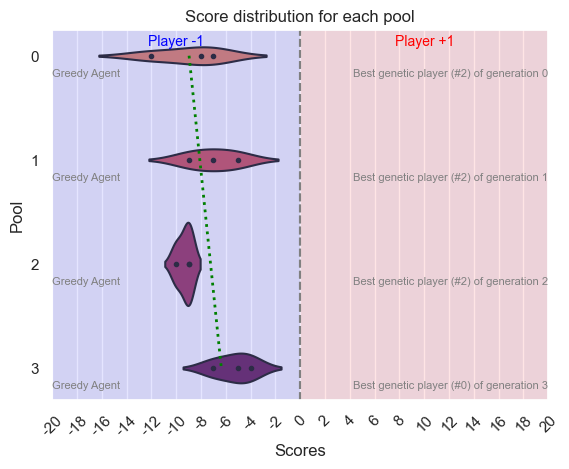

In [198]:
sns.set_theme()
x_ticks = np.arange(-20, 22, 2)
y_ticks = np.arange(0, len(df[' Scores']), 1)

fig = sns.violinplot(data=df[' Scores'], palette="flare", inner="points", orient="h")
# Tendency of the mean score
z = np.polyfit(y_ticks, df['mean_scores'], 1)
p = np.poly1d(z)
fig.plot(p(y_ticks), y_ticks, c="green", ls=":", label="Tendency", linewidth=2)
fig.set(xlim=(-20, 20))
rect_p1=mpatches.Rectangle((0,-1),20,5, alpha=0.1,facecolor="red")
rect_m1=mpatches.Rectangle((-20,-1),20,5, alpha=0.1,facecolor="blue")

fig.set(title='Score distribution for each pool', xlabel='Scores', ylabel='Pool', xticks=x_ticks)
fig.set_xticklabels(x_ticks, rotation=45)
fig.text(10, -0.1, 'Player +1', fontsize = 10, color='red', ha='center')
fig.text(-10, -0.1, 'Player -1', fontsize = 10, color='blue', ha='center')
fig.add_line(plt.axvline(x=0, color='grey', linestyle='--'))
fig.add_patch(rect_p1)
fig.add_patch(rect_m1)

for row in df.iterrows():
    fig.text(-20, row[0]+0.2, str(row[1][' Agent -1']), color='grey', ha="left", fontsize=8)
    fig.text(20, row[0]+0.2, str(row[1][' Agent 1']), color='grey', ha="right", fontsize=8)

[Text(20, 0, '20'),
 Text(22, 0, '22'),
 Text(24, 0, '24'),
 Text(26, 0, '26'),
 Text(28, 0, '28'),
 Text(30, 0, '30'),
 Text(32, 0, '32'),
 Text(34, 0, '34'),
 Text(36, 0, '36'),
 Text(38, 0, '38'),
 Text(40, 0, '40'),
 Text(42, 0, '42'),
 Text(44, 0, '44')]

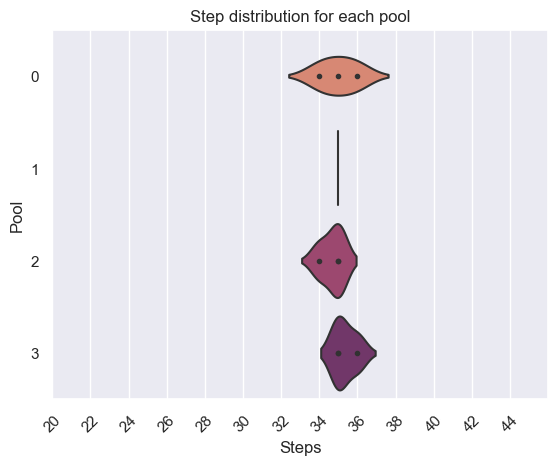

In [200]:
sns.set_theme()
x_ticks = np.arange(20, 46, 2)
y_ticks = np.arange(0, len(df[' Steps']), 1)

fig = sns.violinplot(data=df[' Steps'], palette="flare", inner="points", orient="h")
fig.set(xlim=(20, 46))

fig.set(title='Step distribution for each pool', xlabel='Steps', ylabel='Pool', xticks=x_ticks)
fig.set_xticklabels(x_ticks, rotation=45)


In [274]:
df = pd.read_csv('pool_results.csv', sep=';', index_col=0)


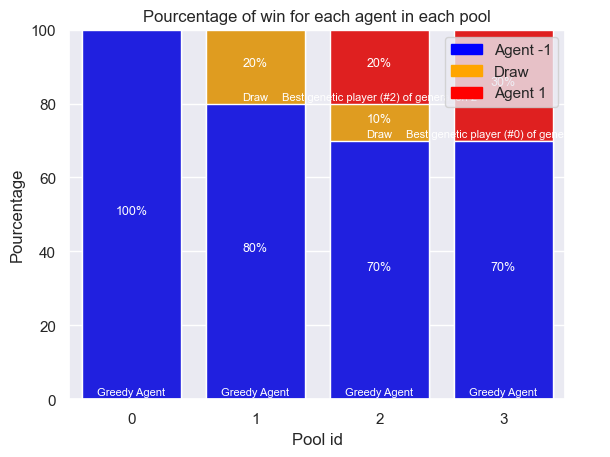

In [311]:

df['Cumulative_m1'] = df['Pct Agent -1'] * 100

df['Cumulative_draw'] = df['Pct Draw']*100 + df['Pct Agent -1']*100
df['Cumulative_p1'] = df['Cumulative_draw'] + df['Pct Agent 1']*100

bar_p1 = sns.barplot(x=df.index, y="Cumulative_p1", data=df, color='red')
bar_draw = sns.barplot(x=df.index, y="Cumulative_draw", data=df, color='orange')
bar_m1 = sns.barplot(x=df.index, y="Cumulative_m1", data=df, color='blue')


m1_bar = mpatches.Patch(color='blue', label='Agent -1')
draw_bar = mpatches.Patch(color='orange', label='Draw')
p1_bar = mpatches.Patch(color='red', label='Agent 1')

for row in df.iterrows():
    if row[1]['Pct Agent -1'] != 0:
        plt.text(row[0], 1,str(row[1]['Agent -1']), color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_m1']/2, str(int(row[1]['Pct Agent -1']*100))+'%', color='white', ha="center", fontsize=9)
    if row[1]['Pct Draw'] != 0:
        plt.text(row[0], row[1]['Cumulative_m1']+1, 'Draw', color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_m1']+row[1]['Pct Draw']*50, str(int(row[1]['Pct Draw']*100))+'%', color='white', ha="center", fontsize=9)
    if row[1]['Pct Agent 1'] != 0:
        plt.text(row[0], row[1]['Cumulative_draw']+1,str(row[1]['Agent 1']), color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_draw']+row[1]['Pct Agent 1']*50, str(int(row[1]['Pct Agent 1']*100))+'%', color='white', ha="center", fontsize=9)


plt.ylim((0,100))
plt.title('Pourcentage of win for each agent in each pool')
plt.ylabel('Pourcentage')
plt.legend(handles=[m1_bar, draw_bar, p1_bar])
plt.show()


In [19]:
import json
params_df = {}
nb_gen = 14
nb_ind = 10
for gen in range(14):
    filename = f"../NN_MT2/gen{gen}.json"

    with open(filename) as f:
        listObj = json.load(f)
        for ind in range(10):
            for param in range(len(listObj['gen'][ind]['parameters'])):
                if param not in params_df:
                    params_df[param] = pd.DataFrame()
                params_df[param].loc[gen, ind] = listObj['gen'][ind]['parameters'][param]

In [87]:
params_df[0]

(14, 10)

In [26]:
params_df[0].iloc[0,:]

0   -0.058222
1   -0.579322
2   -0.215989
3    0.844692
4    0.259493
5   -0.255051
6   -0.758268
7   -0.883194
8    0.286370
9    0.820507
Name: 0, dtype: float64

In [80]:
param = 4

def plot_param_evolution(param, function_name=None):
    x_ticks = np.arange(0, nb_gen, 1)
    y_ticks = np.arange(-1, 1.1, 0.1)

    fig=plt.figure()
    ax=fig.add_subplot(111)


    var = params_df[param].var(axis=1)
    mean = params_df[param].mean(axis=1)
    for ind in range(nb_ind):
        ax.plot(params_df[param].index, params_df[param].iloc[:, ind], c='#666', linewidth=.5, label=None, fillstyle='none')

    ax.plot(params_df[param].index, var, c='#FA5', label=f"Diversity", fillstyle='none')
    ax.plot(params_df[param].index, mean, c='#3AD', linewidth=2, label=f"Mean value", fillstyle='none', marker="+", markersize=10)

    ax.set(title=f"Evolution of the parameter {param} {'used for '+function_name if function_name else ''}", xlabel='Generation', ylabel='Parameter value', xticks=x_ticks)
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.add_line(plt.axhline(y=0, color='grey', linestyle='--'))
    ax.set(ylim=(-1, 1))
    ax.set(xlim=(0, nb_gen-1))
    ax.text(nb_gen-1.1, mean[nb_gen-1], round(mean[nb_gen-1],2), fontsize = 15, color='darkblue', ha='right')
    plt.legend(loc='best')

In [86]:
params_df[0].shape

(14, 10)

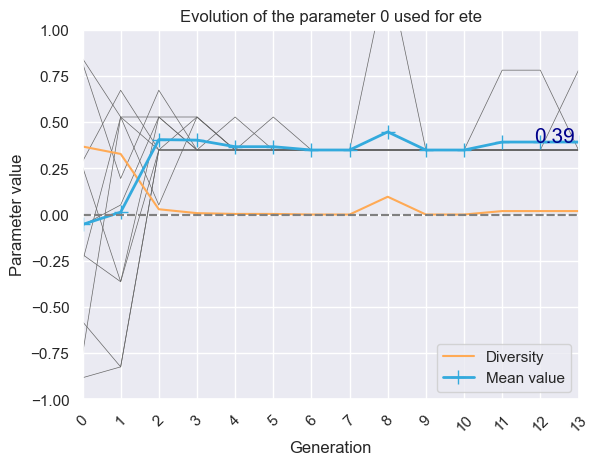

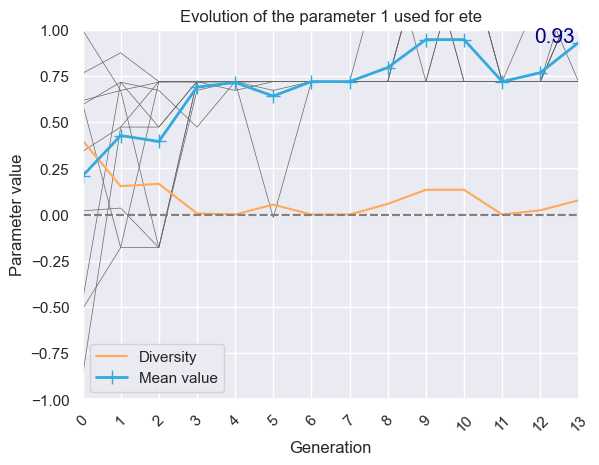

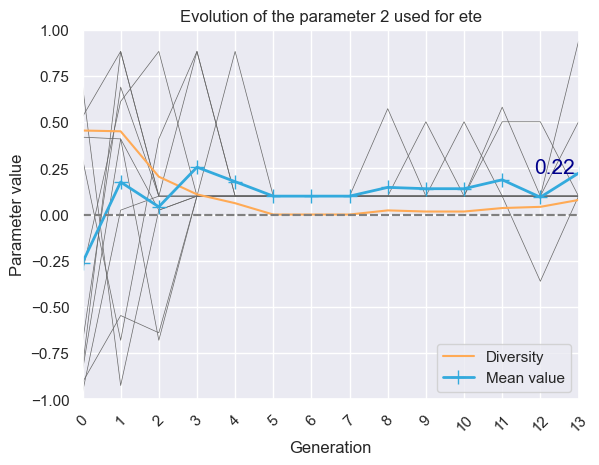

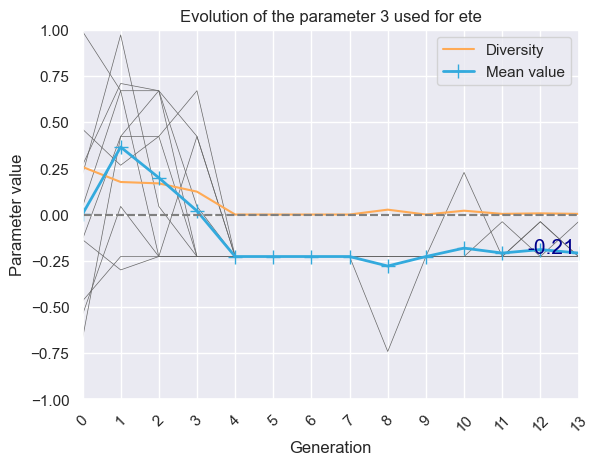

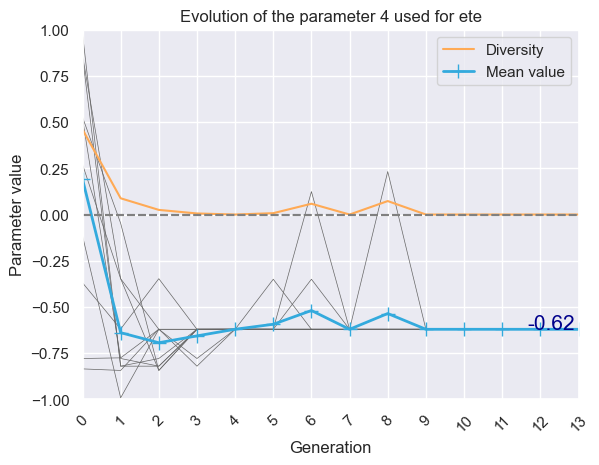

In [82]:
from matplotlib.backends.backend_pdf import PdfPages 
with PdfPages(f"test.pdf") as pdf:
        for a in range(5):
            fig = plot_param_evolution(a, 'ete')
            pdf.savefig(fig)